**EJERCICIO N2**

Con siguiente dataset
```
# https://www.kaggle.com/datasets/vinitdesai564/cats-dogs-classification-dataset
```
Determinar si una imagen es Perro O Gato


---
Integrantes:

Paul Caihuara Caba

Gavino Abdel Gonzales Calle

Marcelo Fernando Condori Mendoza





In [1]:
#Para trabajar en Google Colabo, procedemos a descarga el data set con seguiente lienas
!pip install --upgrade kaggle
from google.colab import files
uploaded = files.upload()


!mkdir -p ~/.kaggle  # Create the .kaggle directory if it doesn't exist
!mv kaggle.json ~/.kaggle/  # Move the kaggle.json file to the correct location
!chmod 600 ~/.kaggle/kaggle.json  # Set the appropriate permissions

Saving kaggle.json to kaggle.json


In [2]:
# Importar la librería kaggle
import kaggle

# Autentificar la API de Kaggle usando el archivo JSON
kaggle.KaggleApi().authenticate()

# Importar la librería kaggle
import kaggle
import os

# Autentificar la API de Kaggle usando el archivo JSON
kaggle.api.authenticate()

# Definir el dataset
dataset = "vinitdesai564/cats-dogs-classification-dataset"


# Crear un directorio para el dataset si no existe
if not os.path.exists("cats-dogs-classification-dataset"):
    os.makedirs("cats-dogs-classification-dataset")

# Descargar los archivos del dataset
kaggle.api.dataset_download_files(dataset, path="cats-dogs-classification-dataset", unzip=True)

print("Dataset descargado y descomprimido en el directorio 'cats-dogs-classification-dataset'")

Dataset URL: https://www.kaggle.com/datasets/vinitdesai564/cats-dogs-classification-dataset
Dataset descargado y descomprimido en el directorio 'cats-dogs-classification-dataset'


Una ves descargado dataset, se procede a clasificar los dataset

In [3]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [16]:
#estamos preprocesando el conjunto de entrenamiento
#rescale: para normalizaar los valores
#0.2 shear_range, es pare mejorar la robuztes del modelo
# zoom_range:0.2 la aleatoridad de los mode.los

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [17]:
#ahora vamos a trabjar con los datos de entrenamiento
#esto hace procesamiento en lotes, de una carpeta
# target_size: redimensiona todas las imagenes , todas la pasa
# luego procesa las imagenes de 32 en 32
# class_mode:
training_set = train_datagen.flow_from_directory('/content/cats-dogs-classification-dataset/test_data',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('/content/cats-dogs-classification-dataset/test_data',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 237 images belonging to 2 classes.
Found 237 images belonging to 2 classes.


In [18]:
#Establece para normalizar en un rango
test_datagen = ImageDataGenerator(rescale = 1./255)

In [19]:
#hasta aqui es preprocesamiento
#ahora crearemos red neuronal
cnn = tf.keras.models.Sequential()
#aqui convulcionamos en 3 capas
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

In [20]:
#luego añadimos otra capa convuncional, hacemos agrupamiento
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2)) #
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
#max pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [21]:
#aqui hacemos el aplanamiento el matriz de 2 x 2 .. lo pasamos a un red unidimiencional
cnn.add(tf.keras.layers.Flatten()) #aplanamiento de matriz de 2x2
#aqui generamos la conexion , se añade un numero de neuronas
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid')) #esto es un capa de salida con un solo neurona

In [22]:
#y hacemos entrenamiento de la red neuronal cnvuncional
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Check if datasets are empty
print("Length of training_set:", len(training_set))
print("Length of test_set:", len(test_set))



Length of training_set: 8
Length of test_set: 8


In [23]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
8/8 [==============================] - 21s 3s/step - loss: 0.7352 - accuracy: 0.5063 - val_loss: 0.6817 - val_accuracy: 0.5232
Epoch 2/25
8/8 [==============================] - 18s 2s/step - loss: 0.6752 - accuracy: 0.6160 - val_loss: 0.6536 - val_accuracy: 0.6920
Epoch 3/25
8/8 [==============================] - 18s 2s/step - loss: 0.6403 - accuracy: 0.7089 - val_loss: 0.6113 - val_accuracy: 0.6751
Epoch 4/25
8/8 [==============================] - 14s 2s/step - loss: 0.6099 - accuracy: 0.6793 - val_loss: 0.6005 - val_accuracy: 0.6709
Epoch 5/25
8/8 [==============================] - 14s 2s/step - loss: 0.5964 - accuracy: 0.6751 - val_loss: 0.5905 - val_accuracy: 0.6709
Epoch 6/25
8/8 [==============================] - 14s 2s/step - loss: 0.5696 - accuracy: 0.7046 - val_loss: 0.5379 - val_accuracy: 0.7384
Epoch 7/25
8/8 [==============================] - 14s 2s/step - loss: 0.5314 - accuracy: 0.7553 - val_loss: 0.4881 - val_accuracy: 0.7806
Epoch 8/25
8/8 [==================

In [24]:
#importamos libre
import numpy as np
from keras.preprocessing import image

In [25]:
#se tiene que dar un foto en particular
test_image = image.load_img('/content/cats-dogs-classification-dataset/test_data/dogs/02-08-23_BLOG_WHAT_TO_FEED_DOGS_IN_HOT_WEATHER_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image) #convertimos la imagen en matriz de numpy
test_image = np.expand_dims(test_image, axis = 0) #esto para trabajar en lotes

In [26]:
#hacemos la prediccion
result = cnn.predict(test_image)
training_set.class_indices

1/1 [==============================] - 0s 111ms/step


{'cats': 0, 'dogs': 1}

In [27]:
#aqui clasificamos
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'

print(prediction)

dog


# **Probamos con imagenes externas conseguida de internet**

In [35]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

1/1 [==============================] - 0s 22ms/step
cat


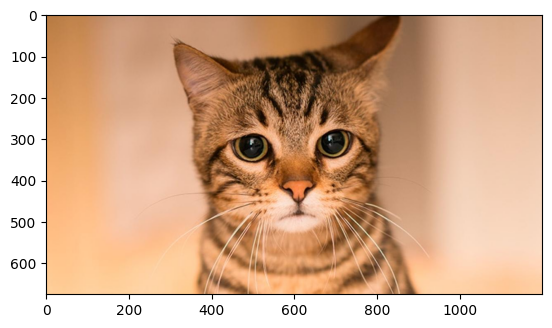

In [38]:
#se tiene que dar un foto en particular
image_path = '/content/gato_internet.jpg'
test_image = image.load_img(image_path, target_size = (64, 64))
test_image = image.img_to_array(test_image) #convertimos la imagen en matriz de numpy
test_image = np.expand_dims(test_image, axis = 0) #esto para trabajar en lotes

#hacemos la prediccion
result = cnn.predict(test_image)
training_set.class_indices

#aqui clasificamos
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'

print(prediction)
img = mpimg.imread(image_path)
imgplot = plt.imshow(img)
plt.show()

1/1 [==============================] - 0s 22ms/step
dog


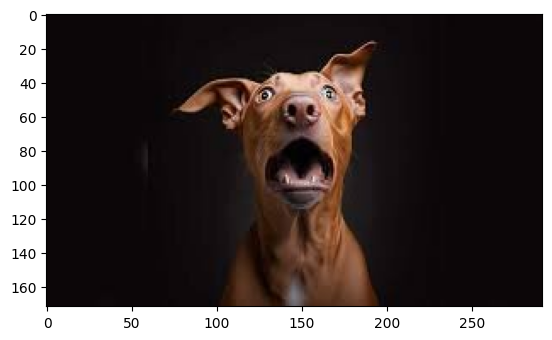

In [39]:
#se tiene que dar un foto en particular
image_path = '/content/perro_internet.jpg'
test_image = image.load_img(image_path, target_size = (64, 64))
test_image = image.img_to_array(test_image) #convertimos la imagen en matriz de numpy
test_image = np.expand_dims(test_image, axis = 0) #esto para trabajar en lotes

#hacemos la prediccion
result = cnn.predict(test_image)
training_set.class_indices

#aqui clasificamos
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'

print(prediction)
img = mpimg.imread(image_path)
imgplot = plt.imshow(img)
plt.show()